In [69]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits=load_digits()

In [70]:
print(digits.images[2])

[[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]


In [71]:
print(digits.target[2])

2


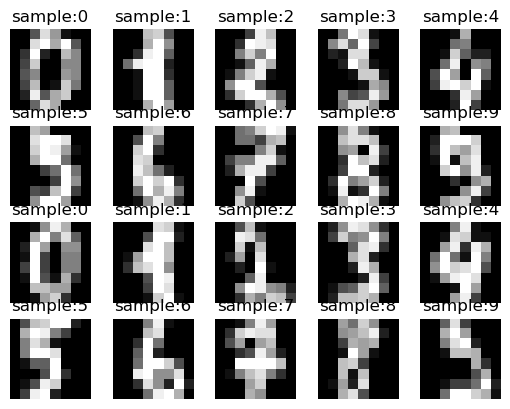

In [72]:
images_and_labels=list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:20]):
    plt.subplot(4, 5, index+1)
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    plt.title('sample:%i'%label)

In [73]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [74]:
x=digits.data
y=digits.target
print(x.shape)
print(y.shape)

(1797, 64)
(1797,)


In [75]:
import torch
import torch.nn as nn
import torch.optim as optim

In [76]:
model=nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10),
)

In [77]:
X=torch.tensor(x, dtype=torch.float32)
Y=torch.tensor(y, dtype=torch.int64)

In [78]:
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters())

In [79]:
loss_list=[]
for epoch in range(1000):
    optimizer.zero_grad()
    y_hat=model(X)
    loss=loss_fn(y_hat,Y)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())

    if epoch % 100 == 0:
        print('Epoch:',epoch, 'Loss:',loss.item())

Epoch: 0 Loss: 2.6490821838378906
Epoch: 100 Loss: 0.39124321937561035
Epoch: 200 Loss: 0.0867660865187645
Epoch: 300 Loss: 0.042255569249391556
Epoch: 400 Loss: 0.023445559665560722
Epoch: 500 Loss: 0.013786629773676395
Epoch: 600 Loss: 0.00856128428131342
Epoch: 700 Loss: 0.005600052885711193
Epoch: 800 Loss: 0.0038717659190297127
Epoch: 900 Loss: 0.002819341840222478


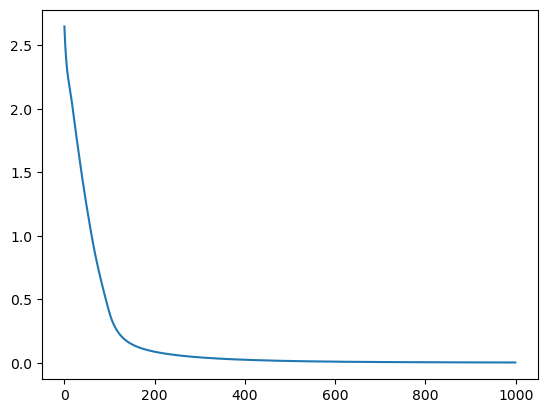

In [80]:
plt.plot(loss_list)

In [81]:
pred=model(X[[0]])

index, predicted=torch.max(pred.data,0)

print(pred)
print(predicted)
print(index)
print(Y[0])

tensor([[  7.9028,  -9.7855,  -7.5059, -10.5191,  -2.3608,  -6.5413,  -4.5628,
         -14.6040,  -8.0559, -13.0883]], grad_fn=<AddmmBackward0>)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([  7.9028,  -9.7855,  -7.5059, -10.5191,  -2.3608,  -6.5413,  -4.5628,
        -14.6040,  -8.0559, -13.0883])
tensor(0)


In [82]:
import numpy as np
from sklearn.datasets import fetch_openml
from torch.utils.data import TensorDataset, DataLoader

In [83]:
mnist=fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [84]:
fashion_mnist=fetch_openml(name='Fashion-MNIST')

In [85]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [86]:
mnist.data[0].shape

(784,)

In [87]:
print(mnist.target.shape)
print(mnist.data.shape)
print(mnist.target)

(70000,)
(70000, 784)
['5' '0' '4' ... '4' '5' '6']


In [88]:
mnist.target=mnist.target.astype(np.int8)
mnist.target

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

In [89]:
x=mnist.data/255
y=mnist.target

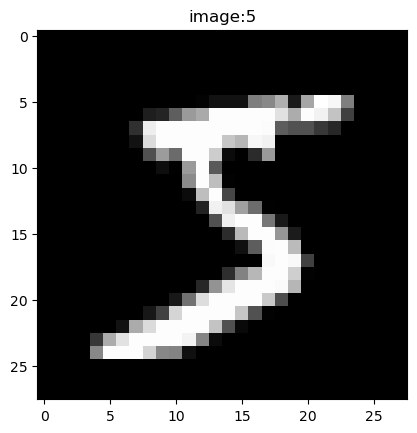

In [90]:
plt.imshow(x[0].reshape(28,28), cmap='gray')
plt.title('image:'+str(y[0]))
plt.show()

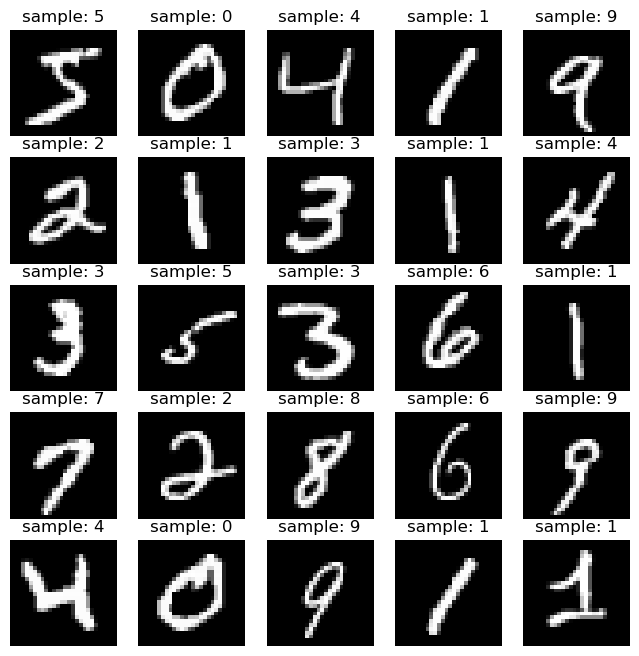

In [91]:
plt.figure(figsize=(8,8))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(x[i].reshape(28,28), cmap='gray')
    plt.title('sample: %i'%(y[i]))
plt.show()

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/7, random_state=0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [93]:
X_train=torch.FloatTensor(x_train)
X_test=torch.FloatTensor(x_test)
Y_train=torch.LongTensor(y_train)
Y_test=torch.LongTensor(y_test)

In [105]:
ds_train=TensorDataset(X_train, Y_train)
ds_test=TensorDataset(X_test, Y_test)
load_train=DataLoader(ds_train, batch_size=256, shuffle=True)
load_test=DataLoader(ds_test, batch_size=256, shuffle=True)

In [106]:
model=nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))
model.add_module('relu3', nn.ReLU())

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
  (relu3): ReLU()
)


In [107]:
loss_func=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(), lr=0.1)
print(model.parameters())

<generator object Module.parameters at 0x000002D30A658DD0>


In [113]:
costs=[]
accuracys=[]
epochs=[]

def train(epoch):
    model.train()
    cost=0
    accuracy=0

    for data, targets, in load_train:
        optimizer.zero_grad()
        output=model(data)
        loss=loss_fn(output, targets)
        _, y_hat = torch.max(output.data, 1)
        accuracy += y_hat.eq(targets.data.view_as(y_hat)).sum()
        cost+=loss.item()
        loss.backward()
        optimizer.step()
        print(accuracy)

    epochs.append(epoch)
    costs.append(cost)
    accuracys.append(accuracy.detach().numpy()/60000)
    print(epoch, cost, accuracy.detach().numpy()/60000)

In [109]:
def test():
    model.eval()
    correct=0

    with torch.no_grad():
        for data, targets in load_test:
            output=model(data)
            _, predicted=torch.max(output, 1)
            correct += predicted.eq(targets.data.view_as(predicted)).sum()

    data_num=len(load_test.dataset)
    print('테스트 데이터에서 예측 정확도 : ', data_num, 100*correct/data_num)

In [110]:
test()

테스트 데이터에서 예측 정확도 :  10000 tensor(9.2800)


In [111]:
for epoch in range(10):
    train(epoch)
test()

0 375.634750187397 0.5145333333333333
1 193.90164190530777 0.7329333333333333
2 174.715645134449 0.74315
3 166.05563312768936 0.7502333333333333
4 159.35702097415924 0.7556833333333334
5 153.71227490901947 0.7613666666666666
6 148.56089559197426 0.7660833333333333
7 144.67770966887474 0.77005
8 141.27972865104675 0.773
9 138.69068664312363 0.7751833333333333
테스트 데이터에서 예측 정확도 :  10000 tensor(76.7300)


결과 :  tensor(7)
정답 :  tensor(7)


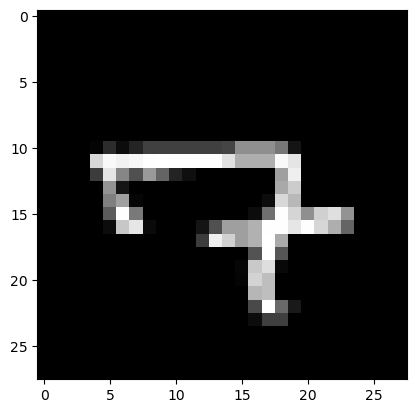

In [101]:
index=4
model.eval()
data=X_test[index]
output=model(data)
_, predicted = torch.max(output.data,0)
print("결과 : ", predicted)
print("정답 : " , Y_test[4])

X_test_show=(X_test[index].numpy())
plt.imshow(X_test_show.reshape(28,28), cmap='gray')
plt.show()